<a href="https://www.kaggle.com/code/pratyushojha12/voting-classifier-of-xgb-catboost-and-naive-bias?scriptVersionId=183704144" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: chocolate; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">
  Loading Dataset
</div>


In [1]:
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e6/sample_submission.csv
/kaggle/input/playground-series-s4e6/train.csv
/kaggle/input/playground-series-s4e6/test.csv


In [2]:
train_df=pd.read_csv('/kaggle/input/playground-series-s4e6/train.csv')
test_df=pd.read_csv('/kaggle/input/playground-series-s4e6/test.csv')
train_df

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,1,17,1,9254,1,1,121.0,1,19,...,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
76514,76514,1,1,6,9254,1,1,125.0,1,1,...,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate
76515,76515,5,17,1,9085,1,1,138.0,1,37,...,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,Enrolled
76516,76516,1,1,3,9070,1,1,136.0,1,38,...,0,6,0,0,0.000000,0,7.6,2.6,0.32,Dropout


In [3]:
sub=pd.read_csv("/kaggle/input/playground-series-s4e6/sample_submission.csv")
sub

,id,Target
0,76518,Graduate
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Graduate
...,...,...
51007,127525,Graduate
51008,127526,Graduate
51009,127527,Graduate
51010,127528,Graduate


<div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: chocolate; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">
  Importing Liberaries
</div>


In [4]:
# Data Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

# Artificial Neural Network (ANN)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# Optimization
import optuna

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')
plt.style.use('fivethirtyeight')


2024-06-15 17:55:26.754508: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-15 17:55:26.754714: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-15 17:55:26.913434: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
train_df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,19,5,5,122.6,0,0,0,1,0,1,18,0,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,19,9,9,119.8,1,0,0,1,0,0,18,0,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,19,2,3,144.7,0,0,0,1,1,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,3,3,2,126.1,1,0,0,1,0,1,18,0,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,37,4,9,120.1,1,0,0,1,0,0,18,0,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [6]:
train_df.columns

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

In [7]:
num_col = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_col = train_df.select_dtypes(include=['object']).columns.tolist()
num_col

['id',
 'Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 'Previous qualification (grade)',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflat

In [8]:
cat_col

['Target']

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* only target col is not numerical which we need to change into numerical

In [9]:
!pip install skimpy

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.1.5
    Uninstalling typeguard-4.1.5:
      Successfully uninstalled typeguard-4.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.26.4 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 16.1.0 which is incompatible.
jupyterlab 4.2.1 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is i

In [10]:
from skimpy import skim
skim(train_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 76518  │ │ int64       │ 30    │                                                          │
│ │ Number of columns │ 38     │ │ float64     │ 7     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA  ┃ NA %  ┃ mean      ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ id                    │   0 │     0 │     38260 │   22090 │     0 │ 19130 │ 38260 │ 57390 │ 76520 │ ▇▇▇▇▇▇ │  │
│ │ Marital status        │   0 │     0 │     1.112 │  0.4417 │     1 │     1 │     1 │     1 │     6 │   ▇▁   │  │
│ │ Application mode      │   0 │     0 │     16.05 │   16.68 │     1 │     1 │    17 │    39 │    53 │ ▇▃  ▅  │  │
│ │ Application order     │   0 │     0 │     1.644 │    1.23 │     0 │     1 │     1 │     2 │     9 │  ▇▁▁   │  │
│ │ Course                │   0 │     0 │      9001 │    1803 │    33 │  9119 │  9254 │  9670 │  9991 │      ▇ │  │
│ │ Daytime/evening       │   0 │     0 │    0.9153 │  0.2784 │     0 │     1 │     1 │     1 │     1 │ ▁    ▇ │  │
│ │ attendance            │     │       │           │         │       │       │       │       │       │        │  │
│ │ Previous              │   0 │     0 │     3.659 │   8.624 │     1 │     1 │     1 │     1 │    43 │   ▇    │  │
│ │ qualification         │     │       │           │         │       │       │       │       │       │        │  │
│ │ Previous              │   0 │     0 │     132.4 │      11 │    95 │   125 │ 133.1 │   140 │   190 │   ▃▇▂  │  │
│ │ qualification (grade) │     │       │           │         │       │       │       │       │       │        │  │
│ │ Nacionality           │   0 │     0 │     1.227 │   3.392 │     1 │     1 │     1 │     1 │   109 │   ▇    │  │
│ │ Mother's              │   0 │     0 │     19.84 │    15.4 │     1 │     1 │    19 │    37 │    44 │ ▇ ▅ ▁▇ │  │
│ │ qualification         │     │       │           │         │       │       │       │       │       │        │  │
│ │ Father's              │   0 │     0 │     23.43 │   14.92 │     1 │     4 │    19 │    37 │    44 │ ▅ ▅  ▇ │  │
│ │ qualification         │     │       │           │         │       │       │       │       │       │        │  │
│ │ Mother's occupation   │   0 │     0 │     8.583 │   17.47 │     0 │     4 │     7 │     9 │   194 │   ▇    │  │
│ │ Father's occupation   │   0 │     0 │     8.882 │    16.8 │     0 │     5 │     7 │     9 │   195 │   ▇    │  │
│ │ Admission grade       │   0 │     0 │     125.4 │   12.56 │    95 │   118 │ 124.6 │   132 │   190 │  ▂▇▆▁  │  │
│ │ Displaced             │   0 │     0 │    0.5693 │  0.4952 │     0 │     0 │     1 │     1 │     1 │ ▆    ▇ │  │
│ │ Educational special   │   0 │     0 │  0.003738 │ 0.06102 │     0 │     0 │     0 │     0 │     1 │   ▇    │  │
│ │ needs                 │     │       │           │   

#### 3. Dropping Attritbutes which doesn't imply any meaningful insights in our analysis.

In [11]:
print("Duplicates in Train Dataset: ",train_df.duplicated().sum())

Duplicates in Train Dataset:  0


In [12]:
print("Duplicates in Test Dataset: ",test_df.duplicated().sum())

Duplicates in Test Dataset:  0


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* There is no duplicate item any any train and test dataset 


In [13]:
print("Checking Null Values in Train Dataset")
missing_data = train_df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(train_df))*100,2)
missing_data

Checking Null Values in Train Dataset


,Total No. of Missing Values,% of Missing Values
id,0,0.0
Marital status,0,0.0
Application mode,0,0.0
Application order,0,0.0
Course,0,0.0
Daytime/evening attendance,0,0.0
Previous qualification,0,0.0
Previous qualification (grade),0,0.0
Nacionality,0,0.0
Mother's qualification,0,0.0


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Train dataset have very less number of missing values so we just drop it
* None of the Attribute are having Missing Values in test dataset.  

In [14]:
round(train_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
id,76518.0,38258.50,22088.99,0.00,19129.25,38258.50,57387.75,76517.00
Marital status,76518.0,1.11,0.44,1.00,1.00,1.00,1.00,6.00
Application mode,76518.0,16.05,16.68,1.00,1.00,17.00,39.00,53.00
Application order,76518.0,1.64,1.23,0.00,1.00,1.00,2.00,9.00
Course,76518.0,9001.29,1803.44,33.00,9119.00,9254.00,9670.00,9991.00
Daytime/evening attendance,76518.0,0.92,0.28,0.00,1.00,1.00,1.00,1.00
Previous qualification,76518.0,3.66,8.62,1.00,1.00,1.00,1.00,43.00
Previous qualification (grade),76518.0,132.38,11.00,95.00,125.00,133.10,140.00,190.00
Nacionality,76518.0,1.23,3.39,1.00,1.00,1.00,1.00,109.00
Mother's qualification,76518.0,19.84,15.40,1.00,1.00,19.00,37.00,44.00


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* The Minimum Age is 17 which tell not neccesary to be and adult.


<div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: chocolate; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">
  Exploratory Data Analysis
</div>


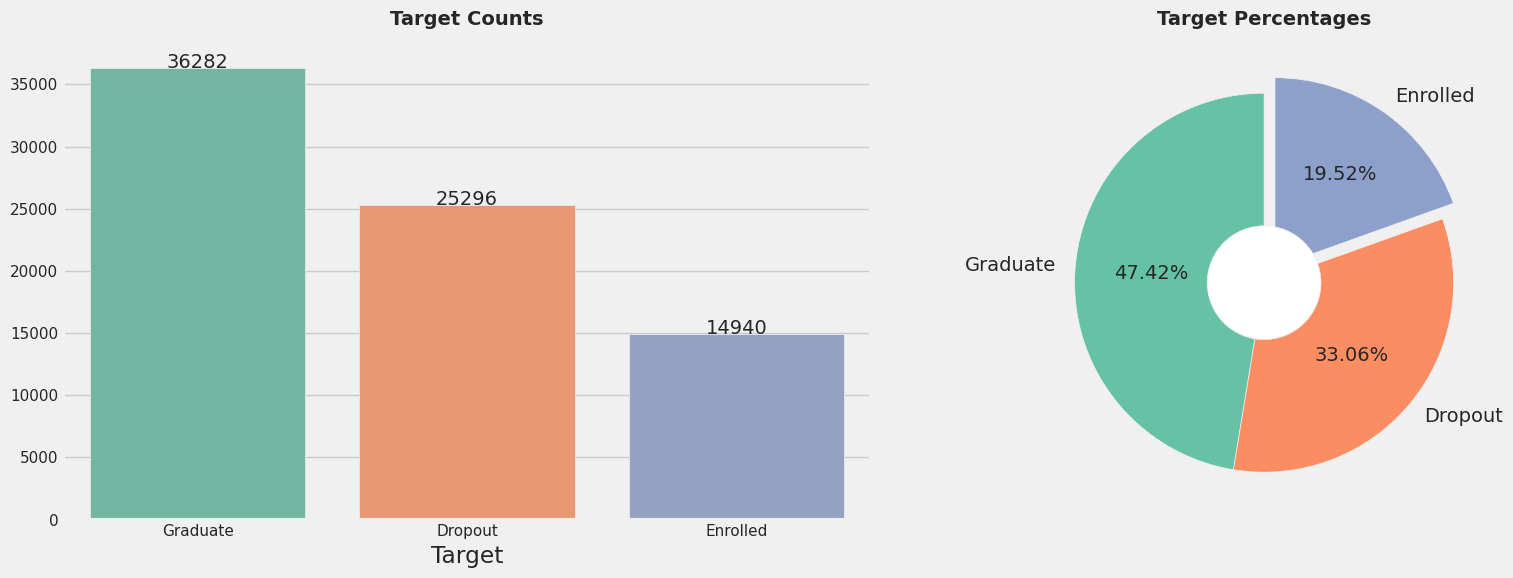

In [15]:
def plot_counts_and_percentages(data, column):
    plt.figure(figsize=(17, 6))

    # Bar plot for counts
    plt.subplot(1, 2, 1)
    counts = data[column].value_counts()
    sns.barplot(x=counts.index, y=counts.values, palette='Set2')
    plt.title(f"{column} Counts", fontweight="black", size=14, pad=15)
    for i, v in enumerate(counts.values):
        plt.text(i, v, v, ha="center", fontsize=14)

    # Pie chart for percentages
    plt.subplot(1, 2, 2)
    colors = sns.color_palette('Set2', len(counts))
    explode = [0] * len(counts)  # No slice will be exploded by default
    explode[-1] = 0.1  # Explode the last slice
    plt.pie(counts, labels=counts.index, autopct="%.2f%%", textprops={"size": 14},
            colors=colors, explode=explode, startangle=90)
    center_circle = plt.Circle((0, 0), 0.3, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    plt.title(f"{column} Percentages", fontweight="black", size=14, pad=15)

    # Display the plots
    plt.tight_layout()
    plt.show()

# Example usage:
plot_counts_and_percentages(train_df, "Target")


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* The person who graduate successfully are 47.42% and who dropout the college are 33.06% remaining 19.52% areEnrolled only


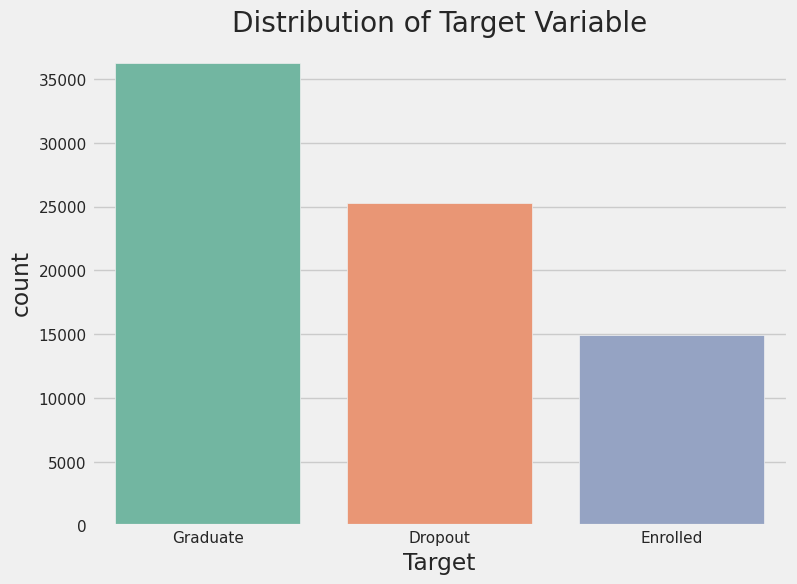

In [16]:

plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=train_df, palette='Set2')
plt.title('Distribution of Target Variable')
plt.show()


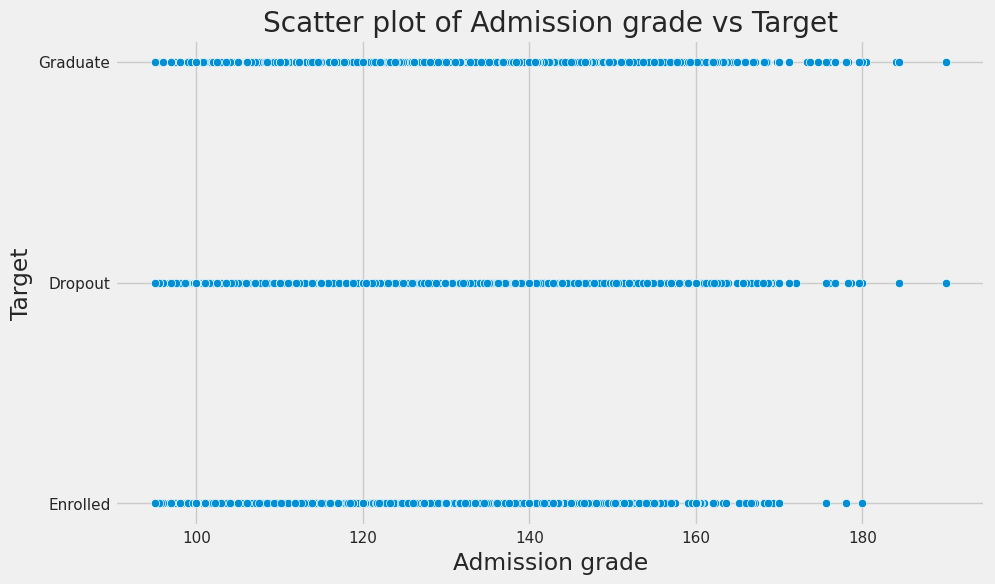

In [17]:
# Scatter plot of 'Admission grade' vs 'Target'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Admission grade', y='Target', data=train_df)
plt.title('Scatter plot of Admission grade vs Target')
plt.xlabel('Admission grade')
plt.ylabel('Target')
plt.show()


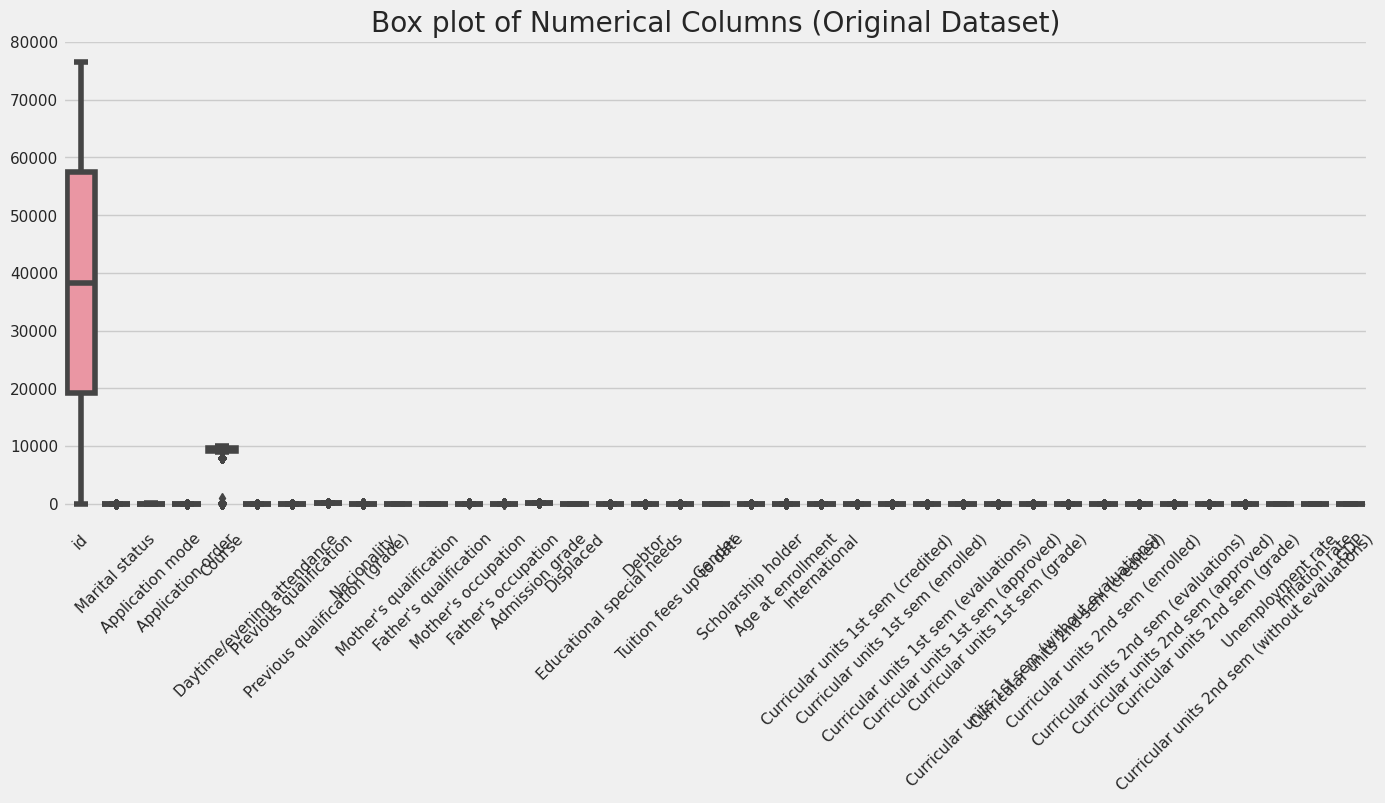

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_outliers(train_df):
    """
    Create box plots to visualize outliers in the original dataset.
    
    Parameters:
        - train_df: Original DataFrame containing the data
        
    Returns:
        None (displays plots)
    """
    # Select numerical columns for outlier detection
    numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns
    
    # Create box plot
    plt.figure(figsize=(15, 6))
    sns.boxplot(data=train_df[numerical_columns])
    plt.title('Box plot of Numerical Columns (Original Dataset)')
    plt.xticks(rotation=45)
    plt.show()

# Visualize outliers in the original dataset
visualize_outliers(train_df)


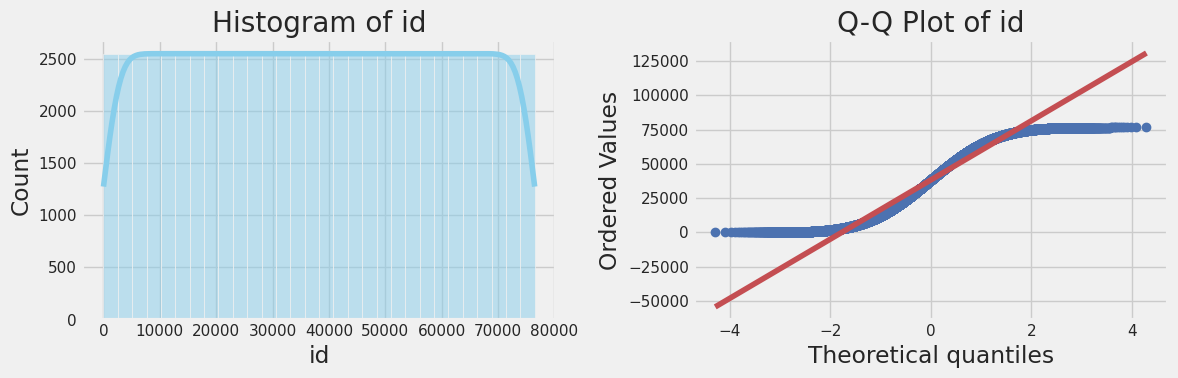

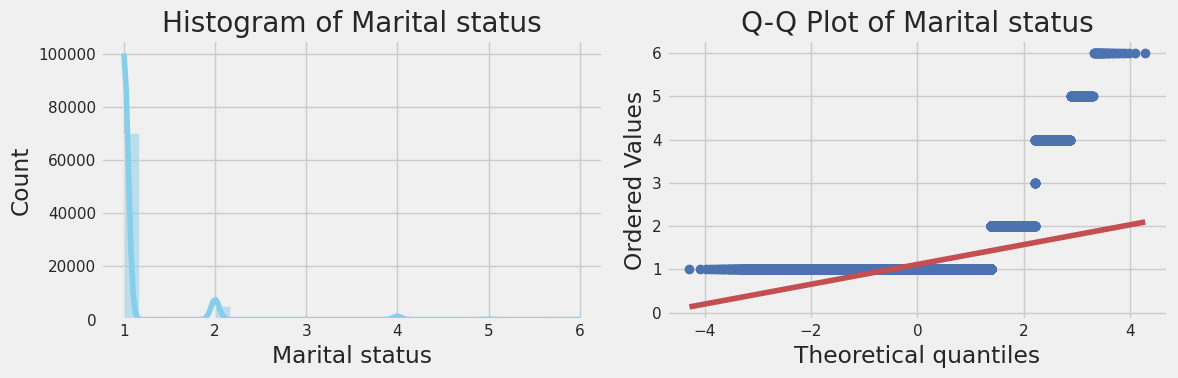

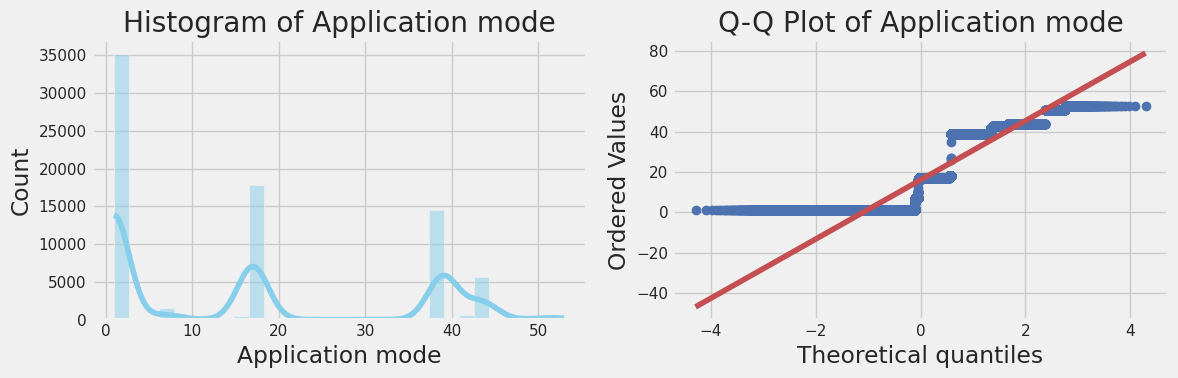

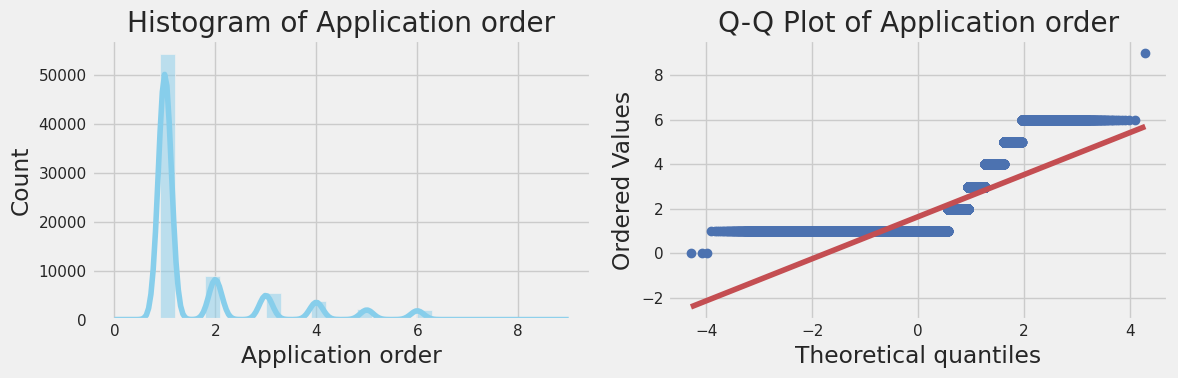

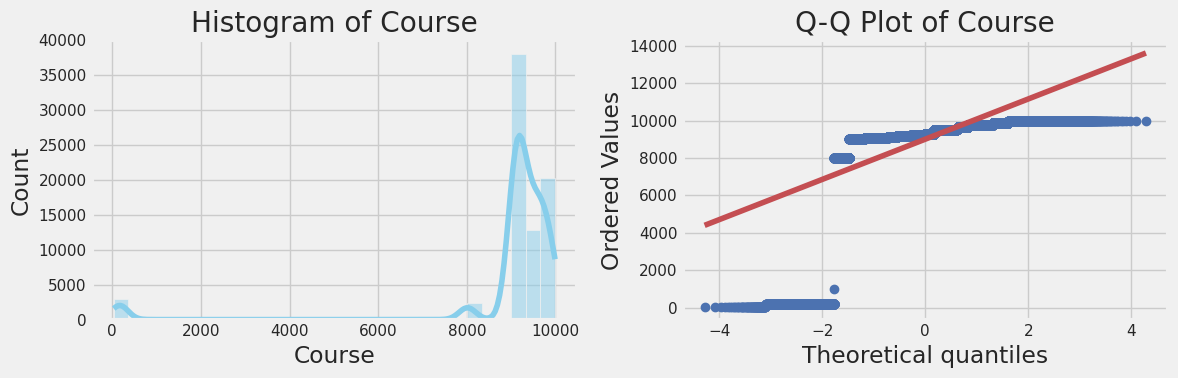

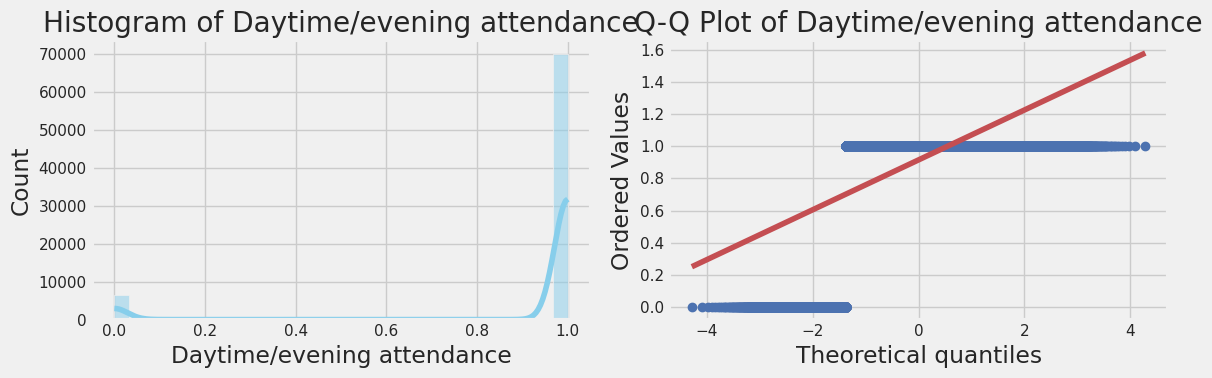

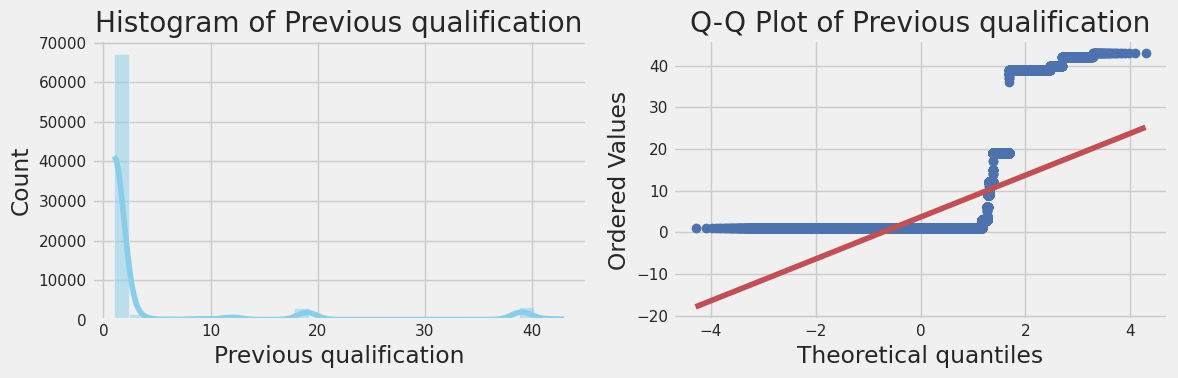

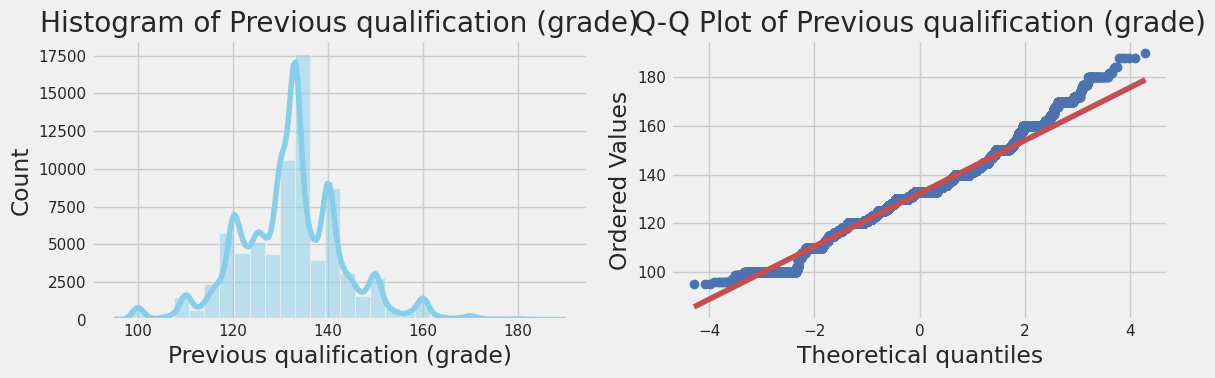

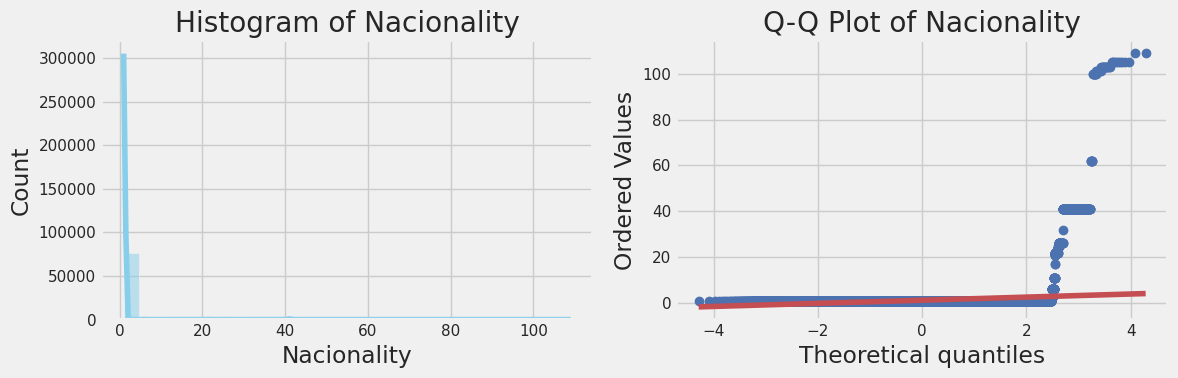

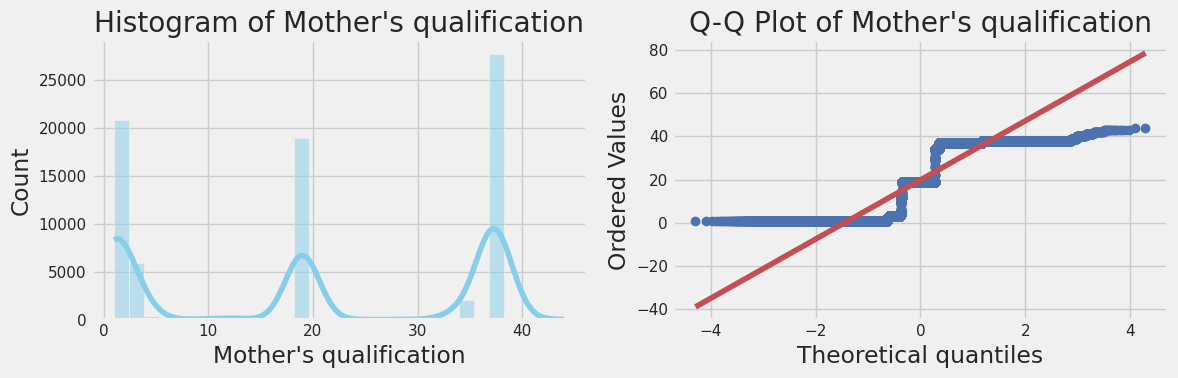

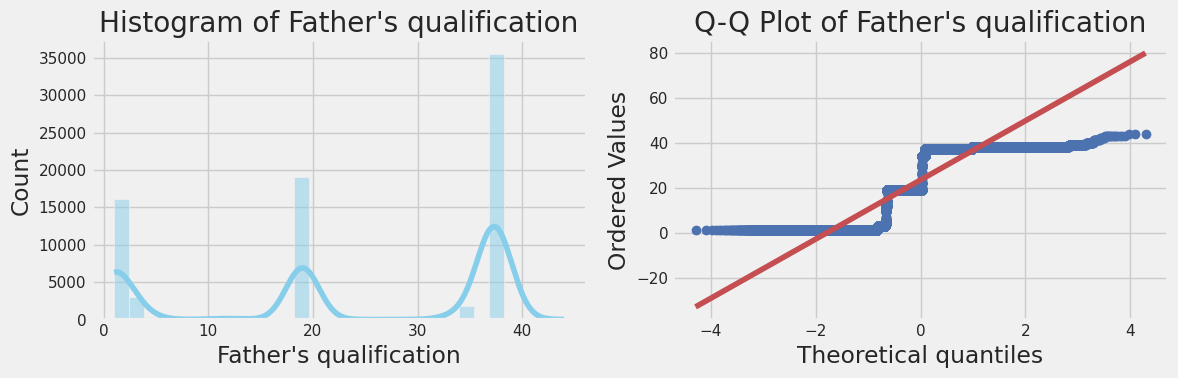

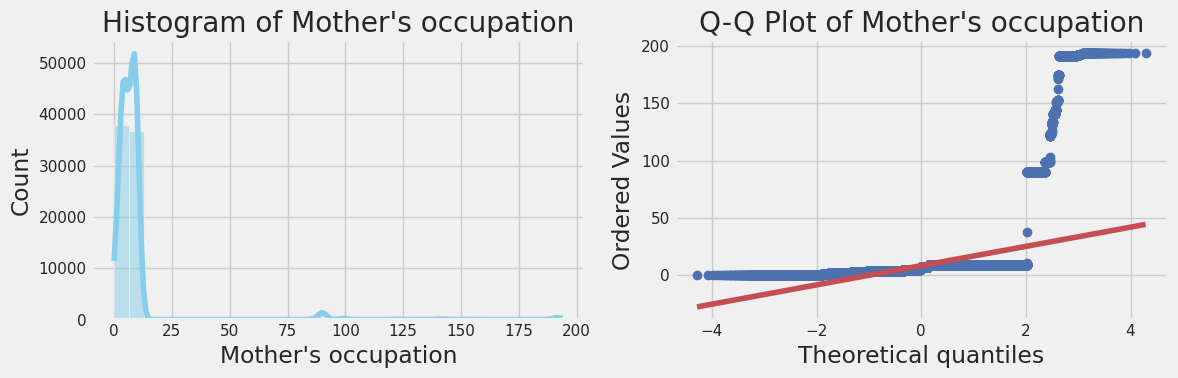

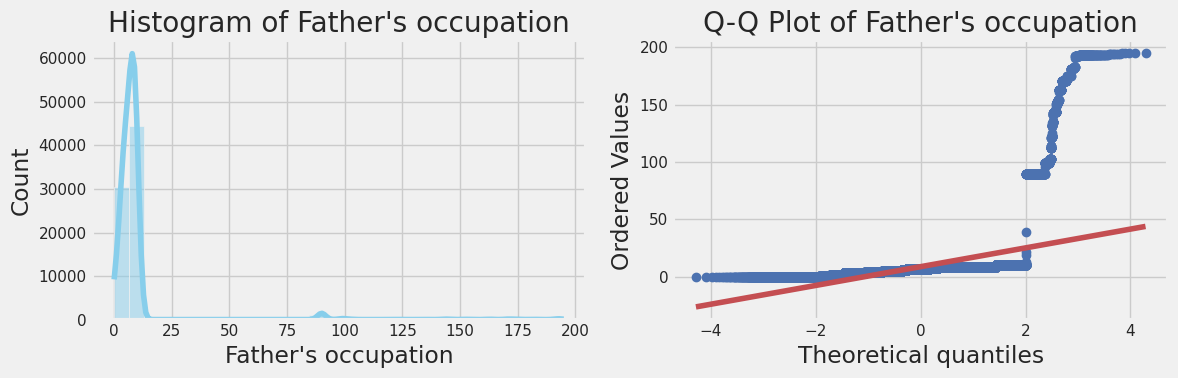

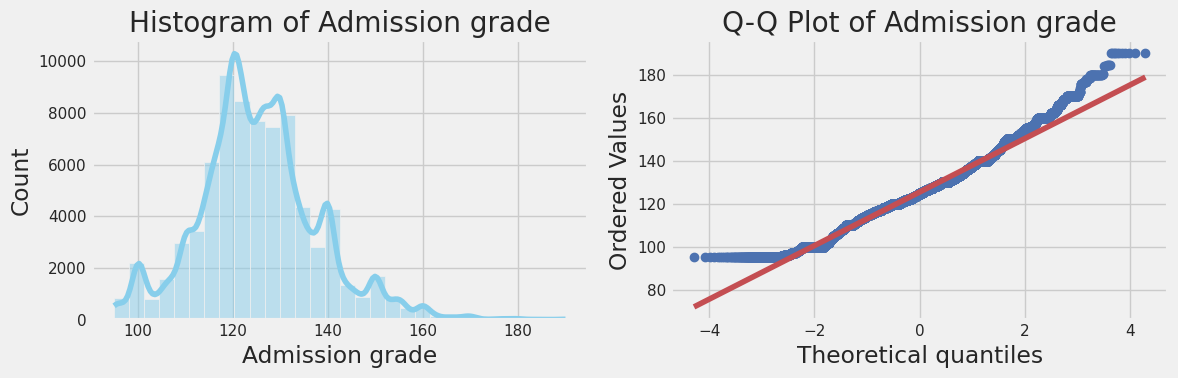

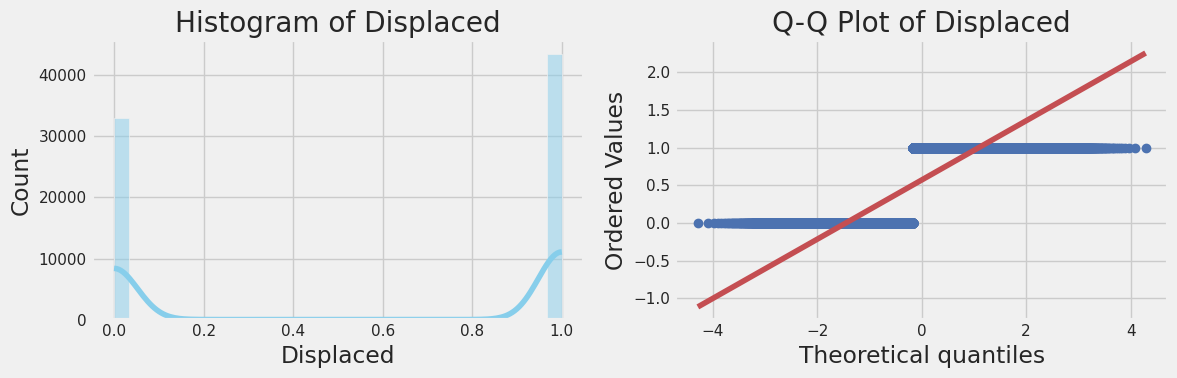

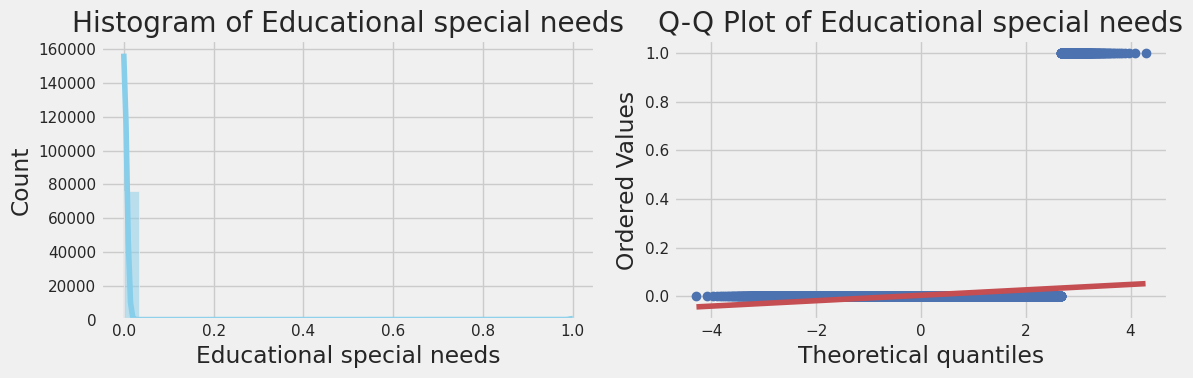

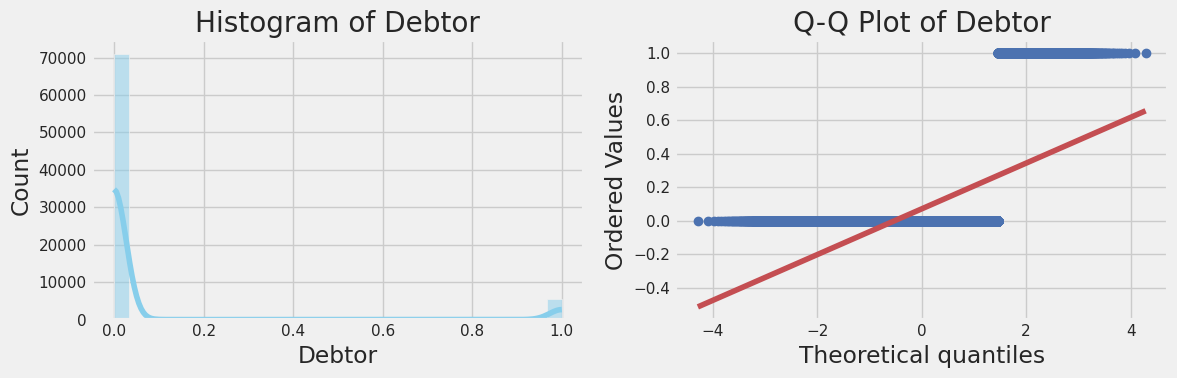

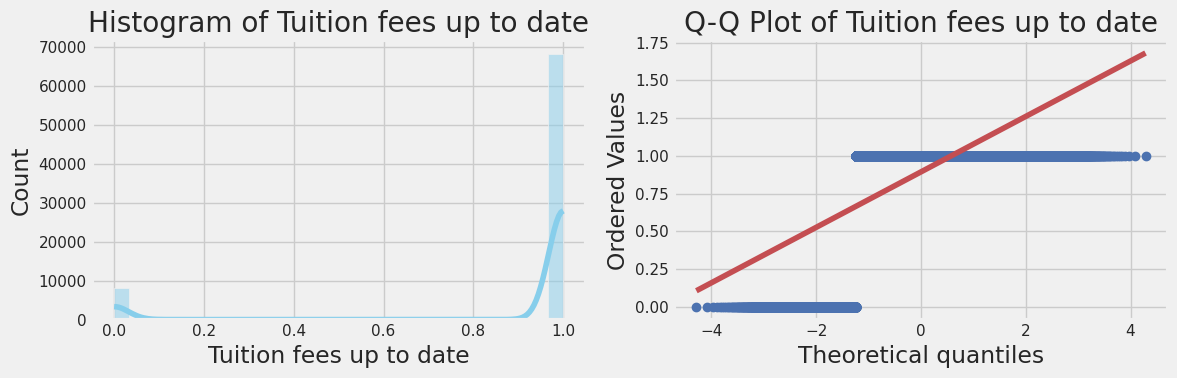

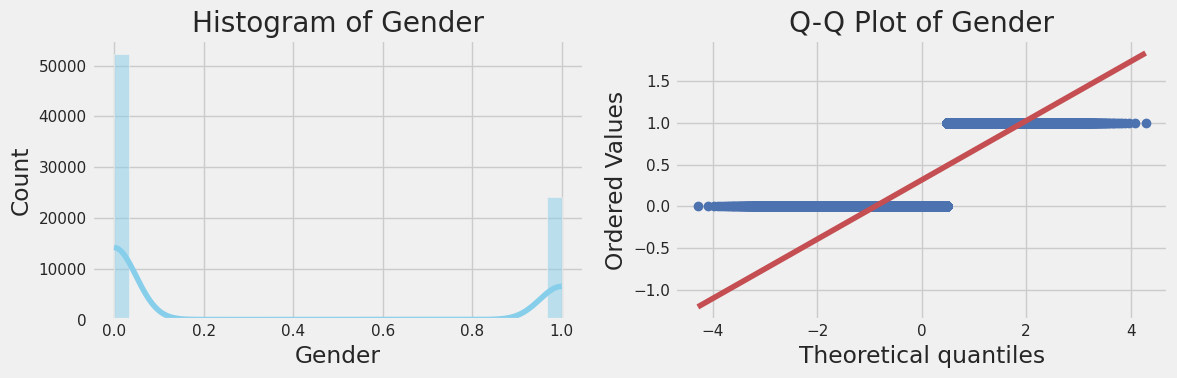

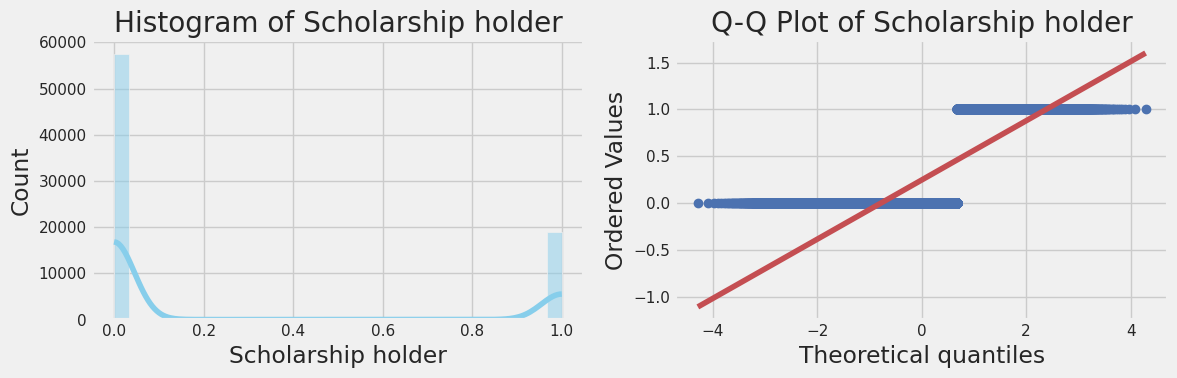

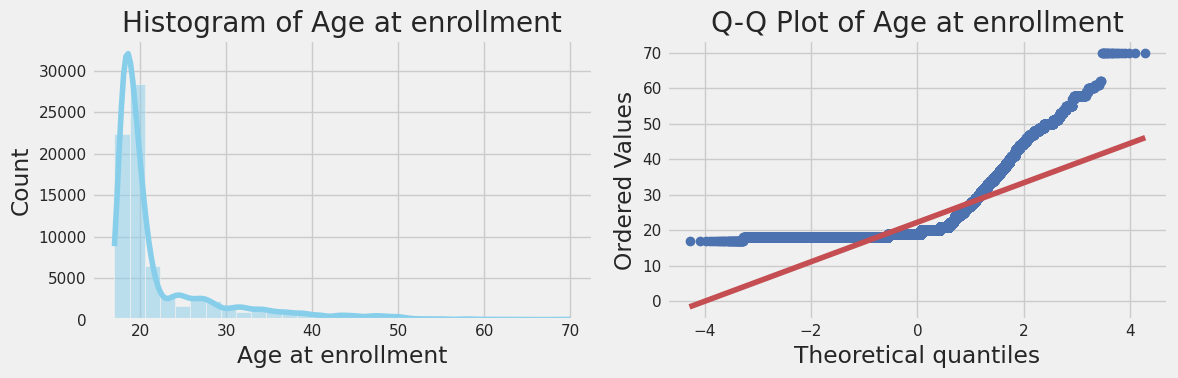

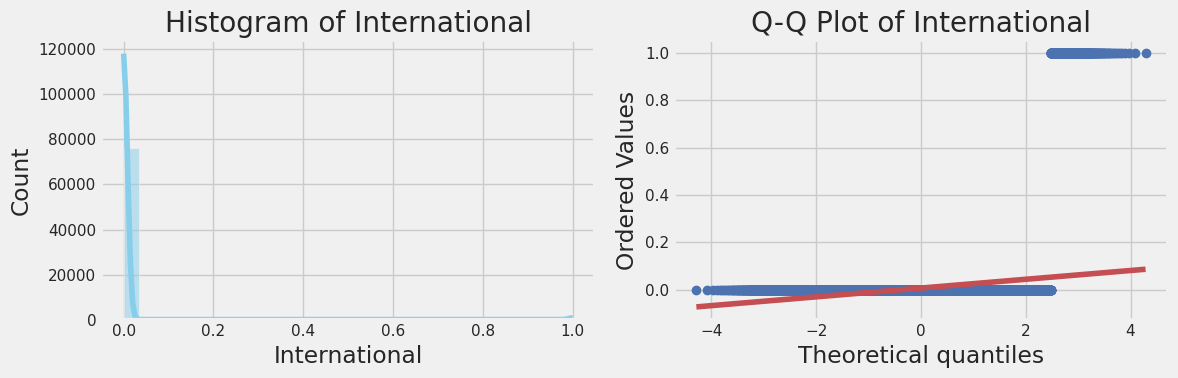

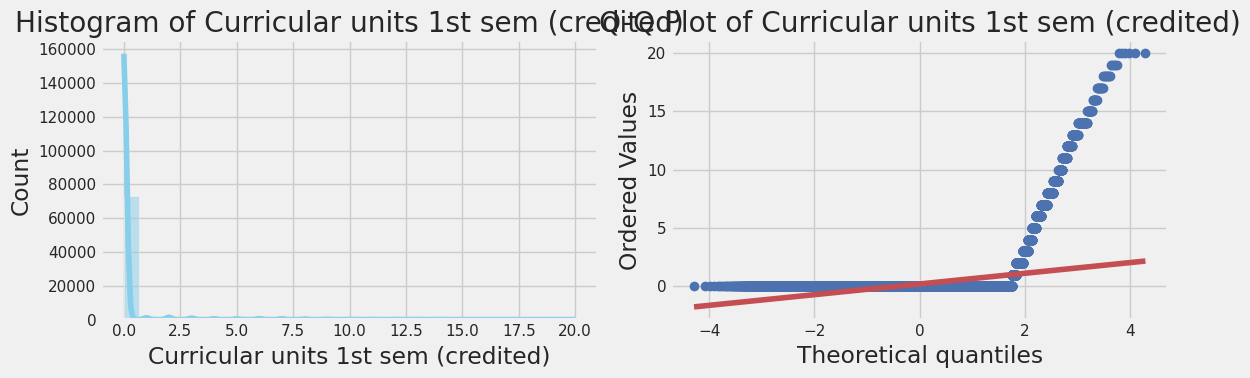

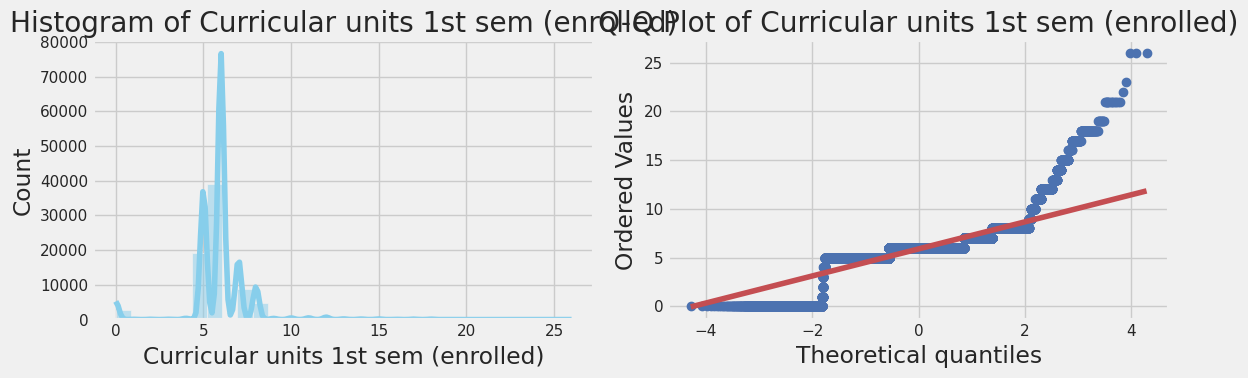

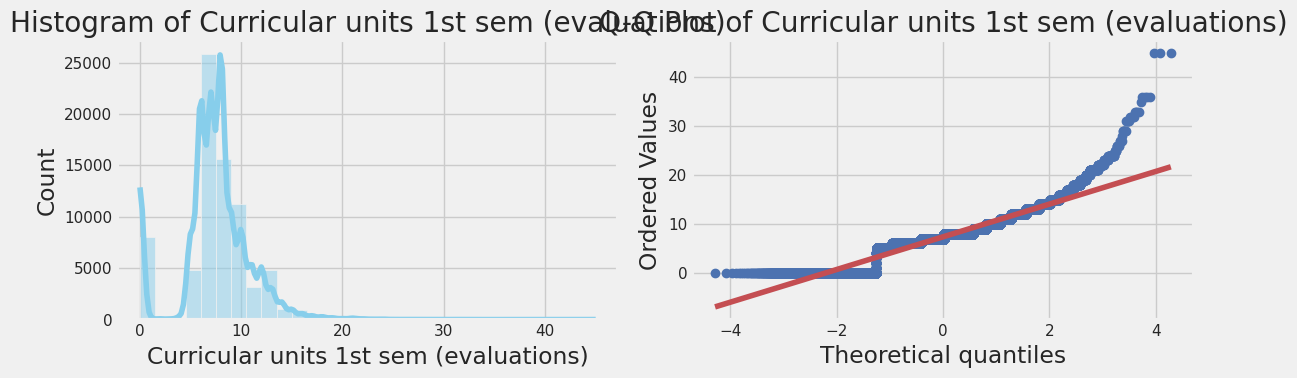

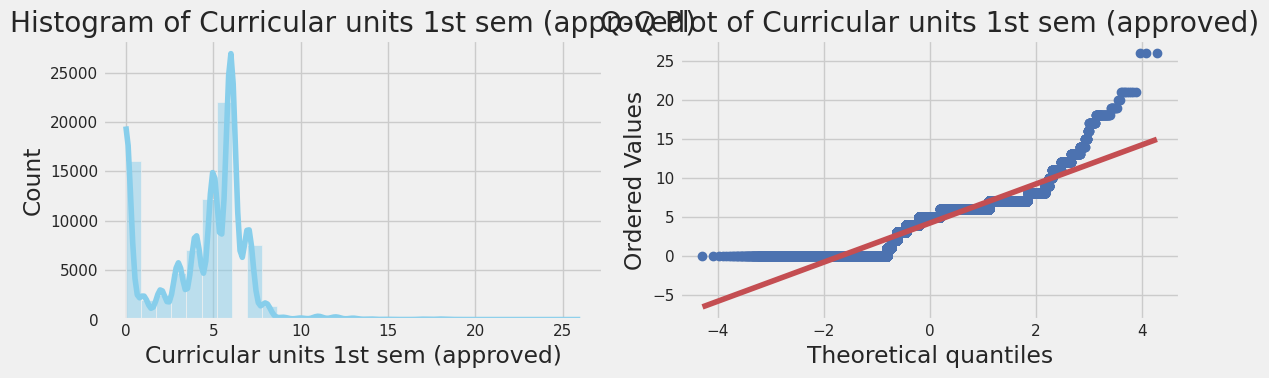

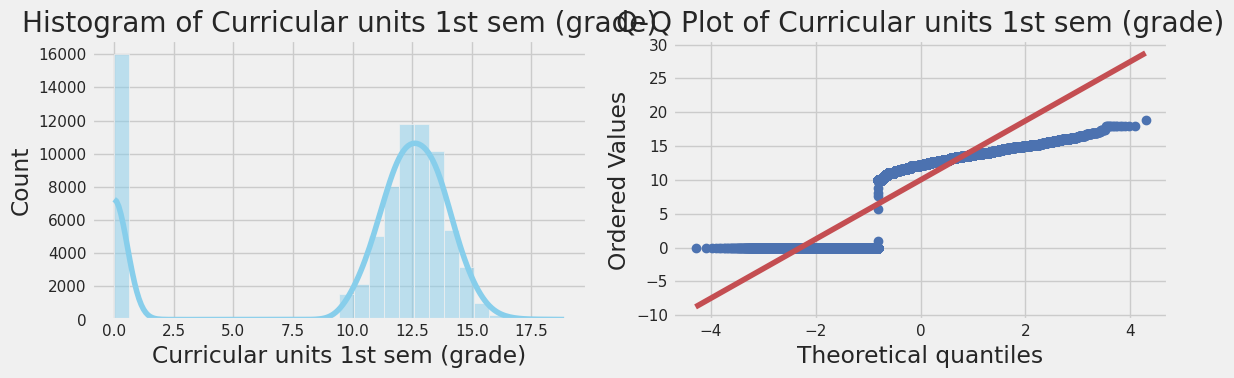

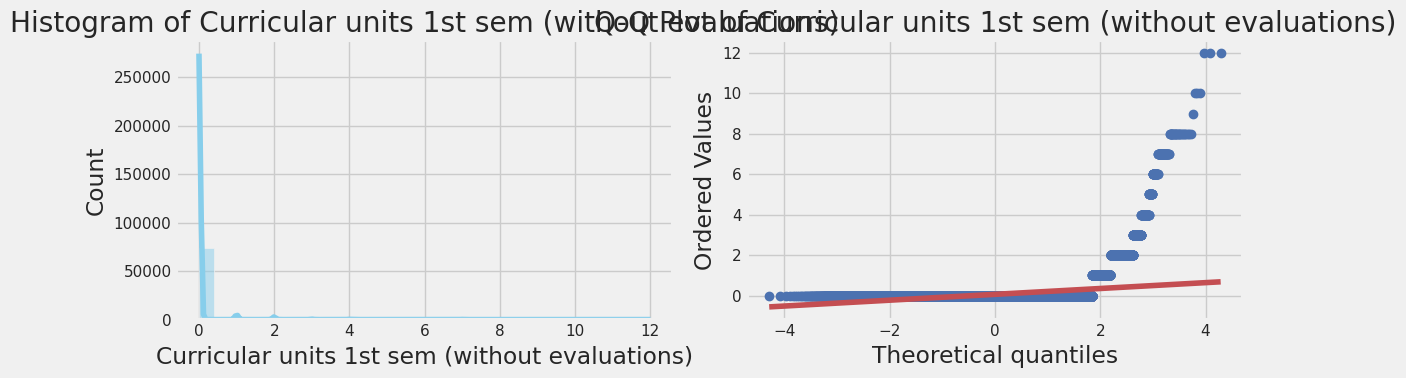

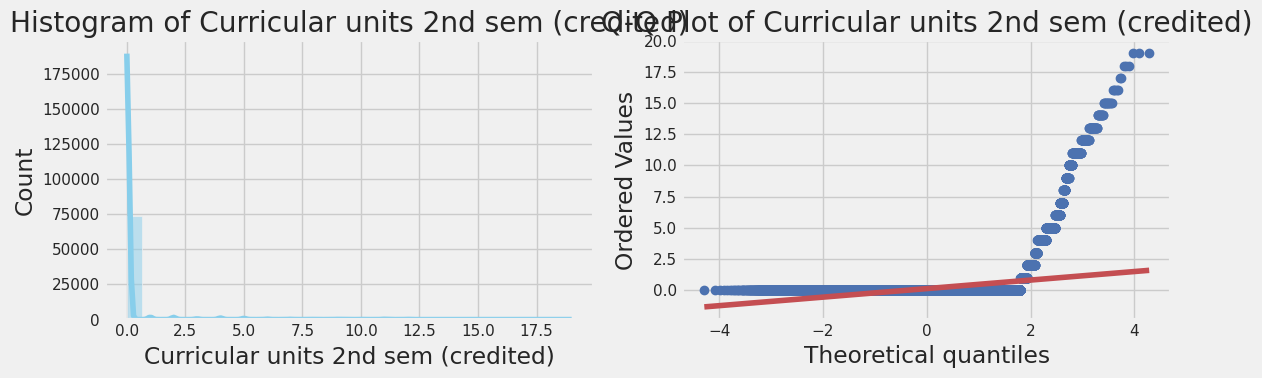

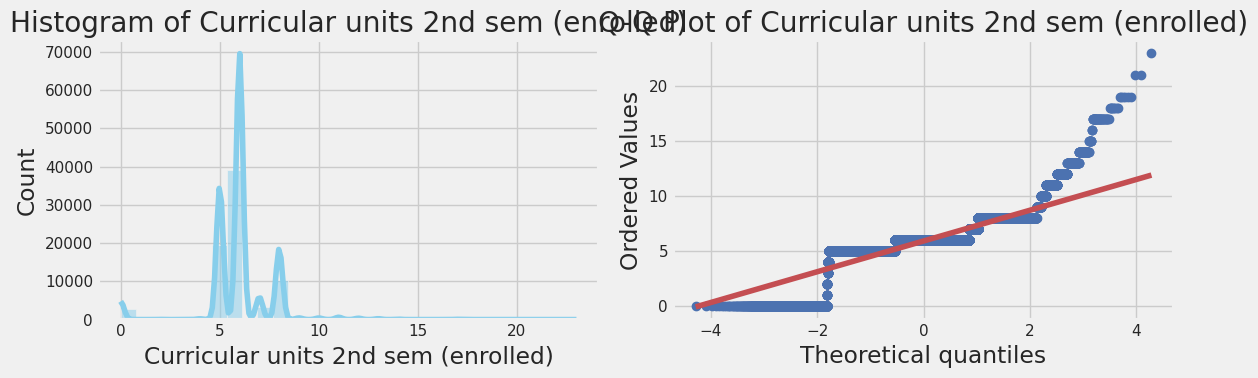

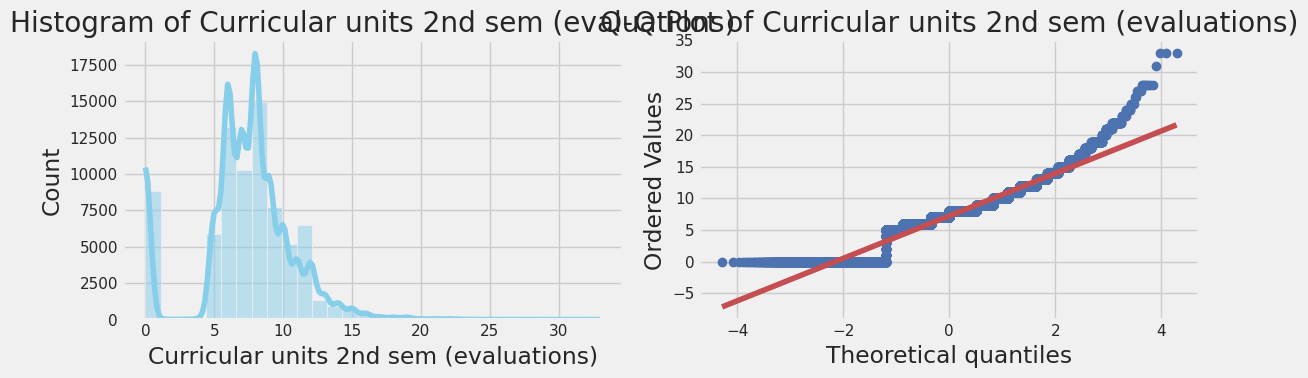

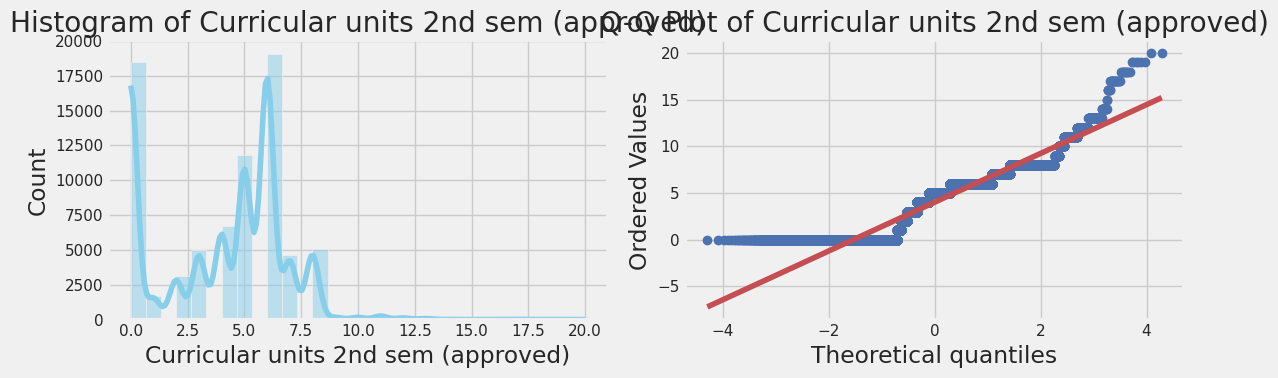

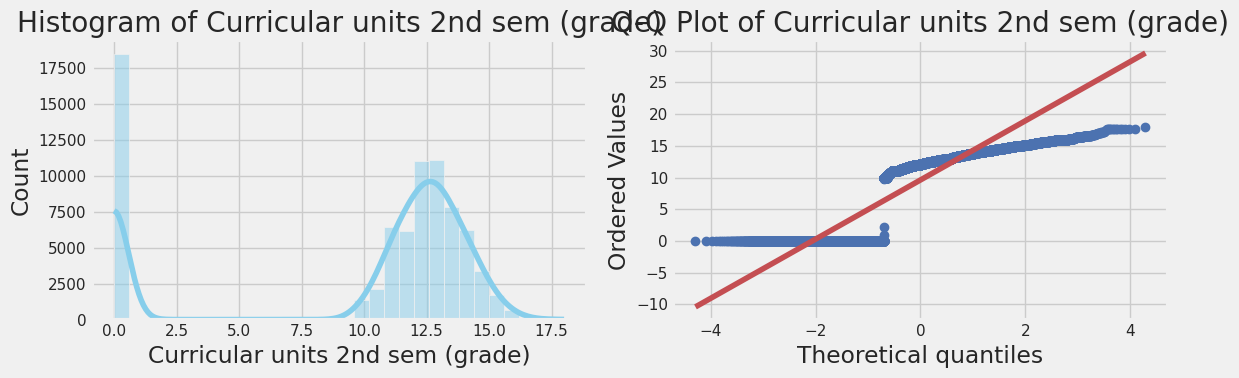

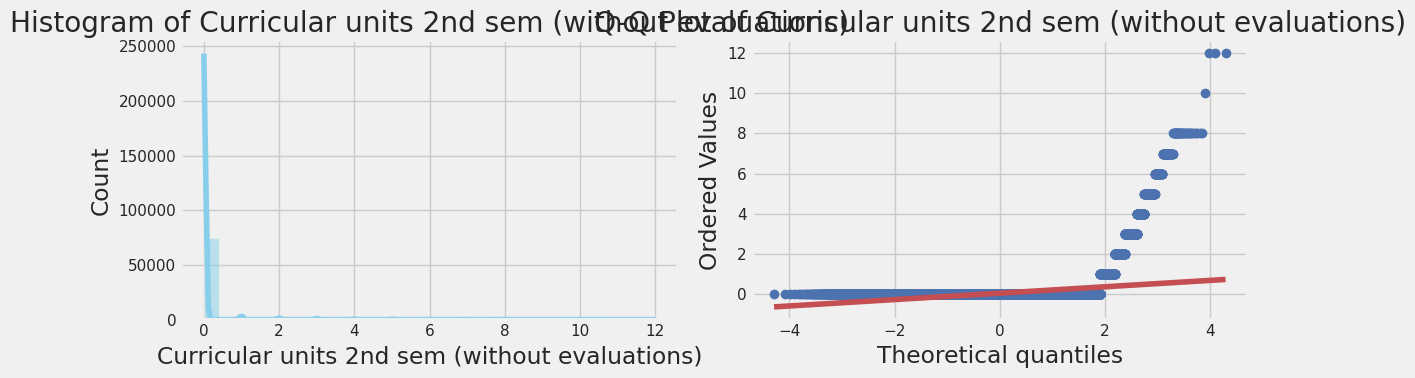

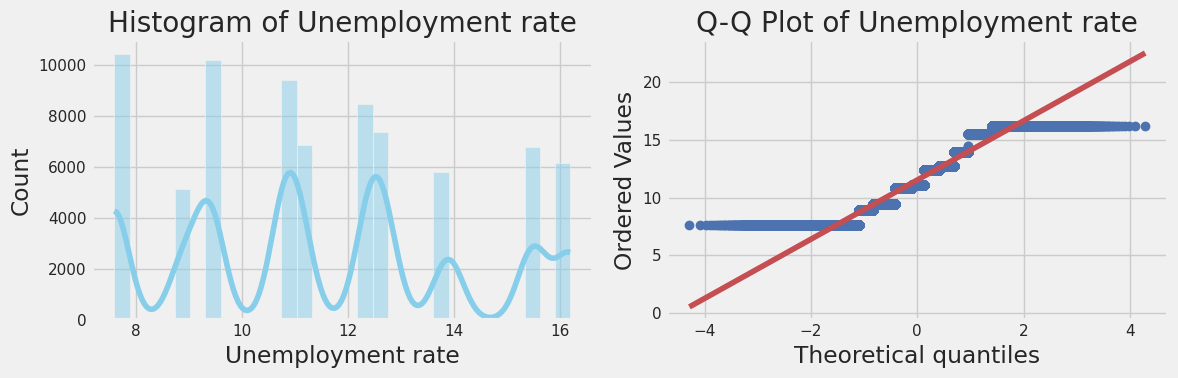

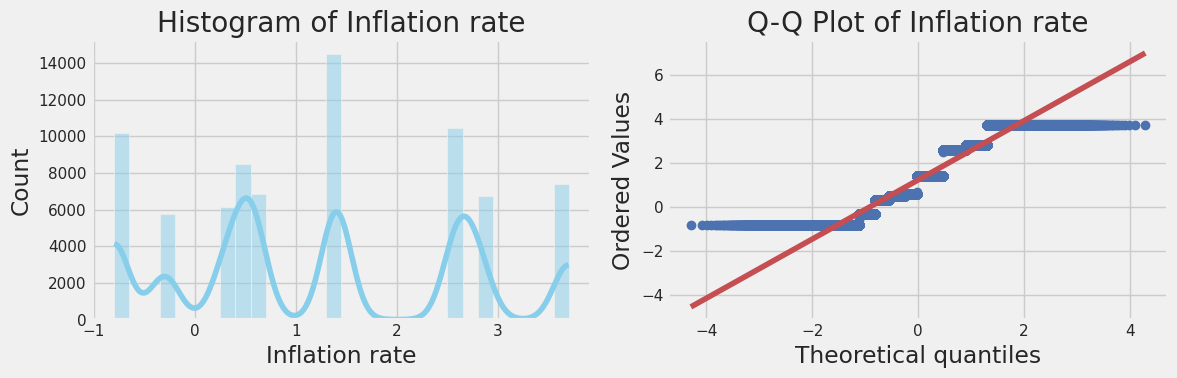

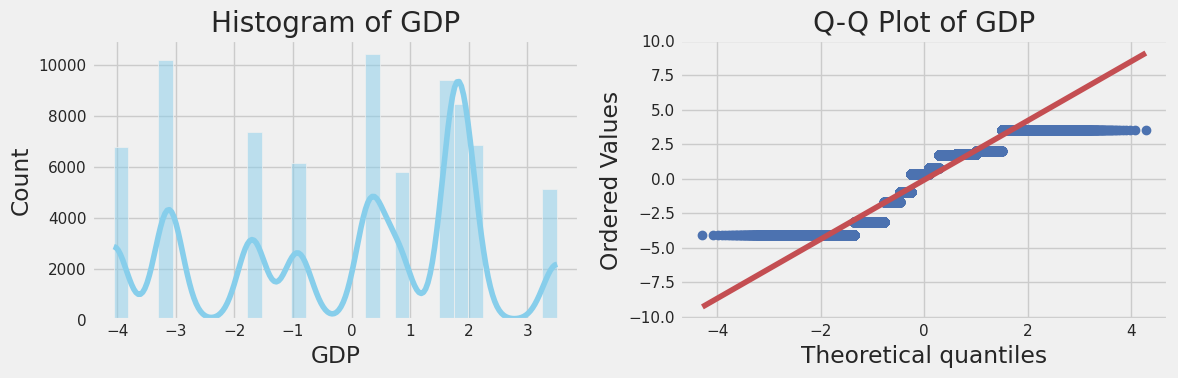

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot

def check_normality(data):
    """
    Check the normality of the data using visual inspection.
    
    Parameters:
        - data: DataFrame containing the data
        
    Returns:
        None (displays plots)
    """
    # Select numerical columns for checking normality
    numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
    
    # Visual inspection: Histograms and Q-Q plots
    for col in numerical_columns:
        plt.figure(figsize=(12, 4))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(data[col], kde=True, color='skyblue', bins=30)
        plt.title(f'Histogram of {col}')

        # Q-Q plot
        plt.subplot(1, 2, 2)
        probplot(data[col], plot=plt)
        plt.title(f'Q-Q Plot of {col}')

        plt.tight_layout()
        plt.show()

# Check normality of the data
check_normality(train_df)


<div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color: chocolate; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">
  Detecting and removing Outlier 
</div>

In [20]:
# from scipy import stats

# def remove_outliers(train_df, threshold=3):
#     """
#     Remove outliers from the dataset using the z-score method.
    
#     Parameters:
#         - data: DataFrame containing the data
#         - threshold: Z-score threshold for identifying outliers
        
#     Returns:
#         - DataFrame without outliers
#     """
#     # Select numerical columns for outlier detection
#     numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns
    
#     # Calculate Z-scores for numerical columns
#     z_scores = stats.zscore(train_df[numerical_columns])
    
#     # Identify rows containing outliers
#     outliers = (abs(z_scores) > threshold).any(axis=1)
    
#     # Remove outliers from the dataset
#     data_cleaned = train_df[~outliers]
    
#     return data_cleaned

# # Apply the function to remove outliers
# train_df = remove_outliers(train_df)

# # Check the shape of the cleaned dataset
# print("Shape of original dataset:", train_df.shape)
# print("Shape of dataset after removing outliers:", train_df.shape)


In [21]:
# from scipy import stats

# def remove_outliers(test_df, threshold=3):
#     """
#     Remove outliers from the dataset using the z-score method.
    
#     Parameters:
#         - data: DataFrame containing the data
#         - threshold: Z-score threshold for identifying outliers
        
#     Returns:
#         - DataFrame without outliers
#     """
#     # Select numerical columns for outlier detection
#     numerical_columns = test_df.select_dtypes(include=['int64', 'float64']).columns
    
#     # Calculate Z-scores for numerical columns
#     z_scores = stats.zscore(test_df[numerical_columns])
    
#     # Identify rows containing outliers
#     outliers = (abs(z_scores) > threshold).any(axis=1)
    
#     # Remove outliers from the dataset
#     data_cleaned = test_df[~outliers]
    
#     return data_cleaned

# # Apply the function to remove outliers
# test_df = remove_outliers(test_df)

# # Check the shape of the cleaned dataset
# print("Shape of original dataset:", test_df.shape)
# print("Shape of dataset after removing outliers:", test_df.shape)


In [22]:
from scipy.stats import boxcox, shapiro  # Import the shapiro function

def check_normal_distribution(train_df):
    """
    Check if numerical columns are normally distributed using the Shapiro-Wilk test.
    If not normally distributed, apply Box-Cox transformation to make them approximately normal.
    
    Parameters:
        - train_df: DataFrame containing the data
        
    Returns:
        - DataFrame with columns transformed to be approximately normally distributed
    """
    # Select numerical columns for checking normality
    numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns
    
    # Create a copy of the original data
    train_df_transformed = train_df.copy()
    
    # Check normality and transform columns if necessary
    for col in numerical_columns:
        # Perform Shapiro-Wilk test
        stat, p_value = shapiro(train_df[col])
        
        # If p-value is less than 0.05, data is not normally distributed
        if p_value < 0.05:
            print(f"{col} is not normally distributed (p-value: {p_value}). Transforming...")
            
            # Add a small constant to make data positive
            min_val = train_df[col].min()
            if min_val <= 0:
                train_df_transformed[col] += abs(min_val) + 0.1  # Add 0.1 for numerical stability
            
            # Apply Box-Cox transformation
            train_df_transformed[col], _ = boxcox(train_df_transformed[col])
            
            # Print confirmation
            print(f"{col} transformed.")
            
    return train_df_transformed

# Check normality and transform columns if necessary
train_df_transformed = check_normal_distribution(train_df)

train_df_transformed


id is not normally distributed (p-value: 0.0). Transforming...
id transformed.
Marital status is not normally distributed (p-value: 0.0). Transforming...
Marital status transformed.
Application mode is not normally distributed (p-value: 0.0). Transforming...
Application mode transformed.
Application order is not normally distributed (p-value: 0.0). Transforming...
Application order transformed.
Course is not normally distributed (p-value: 0.0). Transforming...
Course transformed.
Daytime/evening attendance is not normally distributed (p-value: 0.0). Transforming...
Daytime/evening attendance transformed.
Previous qualification is not normally distributed (p-value: 0.0). Transforming...
Previous qualification transformed.
Previous qualification (grade) is not normally distributed (p-value: 0.0). Transforming...
Previous qualification (grade) transformed.
Nacionality is not normally distributed (p-value: 0.0). Transforming...
Nacionality transformed.
Mother's qualification is not normall

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,-1.136685,0.000000,0.000000,0.090377,1.309466e+15,0.121626,0.0,17.877017,0.0,0.000000,10.136550,1.839112,1.863078,4.130853,-1.579812,-3.369348e+109,-119021.742198,0.115545,-9.111852,0.088723,0.23173,-1.383204e+61,-1.182911e+06,5.713159,4.502045,3.635146,11.026941,-1.461858e+10,-2.477849e+07,6.660692,5.409323,3.305387,7.493782,-1.047542e+11,3.429048,0.459634,4.349642,Graduate
1,0.098595,0.000000,2.895702,0.090377,1.309466e+15,0.121626,0.0,17.803802,0.0,5.825026,10.136550,2.605370,2.652153,4.113931,0.096921,-3.369348e+109,-119021.742198,0.115545,-9.111852,-21.172466,0.23173,-1.383204e+61,-1.182911e+06,5.713159,6.119744,2.406233,8.859862,-1.461858e+10,-2.477849e+07,6.660692,7.050269,-1.235437,-1.100093,-1.047542e+11,3.429048,0.459634,4.349642,Dropout
2,0.975543,0.000000,2.895702,0.503058,1.318477e+15,0.121626,0.0,18.662479,0.0,1.396460,10.136550,0.783570,1.241082,4.251508,-1.579812,-3.369348e+109,-119021.742198,0.115545,0.090875,-21.172466,0.23173,-1.383204e+61,-1.182911e+06,5.713159,-0.977650,-1.144004,-0.981287,-1.461858e+10,-2.477849e+07,6.660692,-0.967246,-1.235437,-1.100093,-1.047542e+11,4.208594,0.192777,2.017288,Dropout
3,1.733172,0.000000,0.000000,0.639893,1.462938e+15,0.121626,0.0,18.238462,0.0,5.825026,1.672068,1.230109,0.788103,4.151437,0.096921,-3.369348e+109,-119021.742198,0.115545,-9.111852,0.088723,0.23173,-1.383204e+61,-1.182911e+06,6.913256,6.911694,4.202568,9.606770,-1.461858e+10,-2.477849e+07,9.765348,8.657119,3.785913,7.698828,-1.047542e+11,3.429048,0.459634,4.349642,Enrolled
4,2.421124,0.000000,0.000000,0.503058,1.462938e+15,0.121626,0.0,18.309851,0.0,5.825026,17.208865,1.566672,2.652153,4.115764,0.096921,-3.369348e+109,-119021.742198,0.115545,-9.111852,-21.172466,0.23173,-1.383204e+61,-1.182911e+06,6.913256,9.235061,3.635146,9.862974,-1.461858e+10,-2.477849e+07,8.188391,9.449966,3.305387,7.757901,-1.047542e+11,2.726142,1.875588,3.028878,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,4012.361337,0.000000,2.895702,0.090377,1.318477e+15,0.121626,0.0,17.507726,0.0,5.825026,0.000000,2.269005,1.863078,4.093438,0.096921,-3.369348e+109,-119021.742198,0.115545,-9.111852,0.088723,0.23173,-1.383204e+61,-1.182911e+06,5.713159,6.911694,3.635146,8.150021,-1.461858e+10,-2.477849e+07,6.660692,6.234606,2.793073,6.513105,-1.047542e+11,3.882943,-0.439312,3.400617,Graduate
76514,4012.398427,0.000000,0.000000,0.772529,1.318477e+15,0.121626,0.0,17.803802,0.0,0.000000,17.568341,1.566672,2.652153,4.182583,0.096921,-3.369348e+109,-119021.742198,0.115545,-9.111852,-21.172466,0.23173,-1.383204e+61,-1.182911e+06,5.713159,16.598240,2.406233,9.912815,-1.461858e+10,-2.477849e+07,6.660692,7.050269,3.305387,8.243806,-1.047542e+11,3.111426,-1.241218,0.039881,Graduate
76515,4012.435517,0.067172,2.895702,0.090377,1.225608e+15,0.121626,0.0,18.732165,0.0,8.478772,17.208865,2.605370,2.802221,4.135020,0.096921,-3.369348e+109,-119021.742198,0.115545,-9.111852,-21.172466,0.23173,-1.383204e+61,-1.182911e+06,4.532018,9.994854,2.406233,9.538297,8.914703e-02,-2.477849

In [23]:
from scipy.stats import boxcox

def check_normal_distribution(test_df):
    """
    Check if numerical columns are normally distributed using the Shapiro-Wilk test.
    If not normally distributed, apply Box-Cox transformation to make them approximately normal.
    
    Parameters:
        - train_df: DataFrame containing the data
        
    Returns:
        - DataFrame with columns transformed to be approximately normally distributed
    """
    # Select numerical columns for checking normality
    numerical_columns = test_df.select_dtypes(include=['int64', 'float64']).columns
    
    # Create a copy of the original data
    test_df_transformed = test_df.copy()
    
    # Check normality and transform columns if necessary
    for col in numerical_columns:
        # Perform Shapiro-Wilk test
        stat, p_value = shapiro(test_df[col])
        
        # If p-value is less than 0.05, data is not normally distributed
        if p_value < 0.05:
            print(f"{col} is not normally distributed (p-value: {p_value}). Transforming...")
            
            # Add a small constant to make data positive
            min_val = test_df[col].min()
            if min_val <= 0:
                test_df_transformed[col] += abs(min_val) + 0.1  # Add 0.1 for numerical stability
            
            # Apply Box-Cox transformation
            test_df_transformed[col], _ = boxcox(test_df_transformed[col])
            
            # Print confirmation
            print(f"{col} transformed.")
            
    return test_df_transformed

# Check normality and transform columns if necessary
test_df_transformed = check_normal_distribution(test_df)

test_df_transformed

id is not normally distributed (p-value: 0.0). Transforming...
id transformed.
Marital status is not normally distributed (p-value: 0.0). Transforming...
Marital status transformed.
Application mode is not normally distributed (p-value: 0.0). Transforming...
Application mode transformed.
Application order is not normally distributed (p-value: 0.0). Transforming...
Application order transformed.
Course is not normally distributed (p-value: 0.0). Transforming...
Course transformed.
Daytime/evening attendance is not normally distributed (p-value: 0.0). Transforming...
Daytime/evening attendance transformed.
Previous qualification is not normally distributed (p-value: 0.0). Transforming...
Previous qualification transformed.
Previous qualification (grade) is not normally distributed (p-value: 0.0). Transforming...
Previous qualification (grade) transformed.
Nacionality is not normally distributed (p-value: 0.0). Transforming...
Nacionality transformed.
Mother's qualification is not normall

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,6096.399854,0.000000,0.000000,0.089843,3.894658e+15,0.122763,0.000000,16.593642,0.0,1.402565,0.000000,0.784601,1.242833,4.011688,-1.577784,-6.598672e+98,-229777.697615,-0.251538,-9.387499,-22.399192,0.230291,-1.803349e+70,-1.863675e+06,6.944210,-0.967660,-1.125027,-0.958841,-1.440758e+10,-3.777448e+07,9.743329,-0.951136,-1.213818,-1.075967,-6.903274e+10,3.858703,-0.439530,3.389453
1,6096.459574,0.000000,0.000000,0.089843,3.475384e+15,0.122763,0.000000,15.839766,0.0,0.000000,10.365263,1.570657,1.866912,3.842691,-1.577784,-6.598672e+98,-229777.697615,0.115879,-9.387499,-22.399192,0.230291,-1.803349e+70,-1.863675e+06,5.736352,5.405580,3.714040,11.929811,-1.440758e+10,-3.777448e+07,6.648124,4.687811,3.376636,8.426893,-6.903274e+10,3.409642,0.459435,4.333008
2,6096.519293,0.000000,0.000000,0.089843,3.475384e+15,0.122763,0.000000,15.229014,0.0,0.000000,10.365263,1.570657,2.659664,3.829884,-1.577784,-6.598672e+98,-229777.697615,0.115879,-9.387499,0.088588,0.230291,-1.803349e+70,-1.863675e+06,5.736352,8.649441,3.714040,9.630571,-1.440758e+10,-3.777448e+07,6.648124,8.965746,2.846450,7.015202,-6.903274e+10,4.086370,1.993331,-1.014059
3,6096.579012,0.000000,3.938970,0.089843,3.338050e+15,0.122763,0.351239,15.958553,0.0,0.000000,10.365263,1.232600,1.242833,3.912690,-1.577784,-6.598672e+98,-229777.697615,0.115879,-9.387499,0.088588,0.230292,-1.803349e+70,1.396781e-01,5.736352,11.781245,3.097305,9.223796,-1.440758e+10,1.175429e-01,9.743329,11.459556,2.846450,7.015202,-6.903274e+10,2.994827,1.082488,5.437987
4,6096.638731,0.000000,3.808507,0.089843,4.186406e+15,0.122763,0.000000,14.718392,0.0,0.000000,17.708795,1.844541,1.866912,3.781814,0.096927,-6.598672e+98,-229777.697615,0.115879,-9.387499,-22.399192,0.230292,-1.803349e+70,-1.863675e+06,5.736352,7.044637,1.746705,8.815554,-1.440758e+10,-3.777448e+07,6.648124,7.276240,2.276195,6.821775,8.391458e-02,2.713336,1.872882,3.019653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,8940.130107,0.000000,0.000000,0.483215,3.052059e+08,0.122763,0.000000,15.839766,0.0,8.746264,17.708795,2.277130,2.810555,3.886201,0.096927,-6.598672e+98,-229777.697615,0.115879,-9.387499,-22.399192,0.230291,-1.803349e+70,-1.863675e+06,-0.836807,-0.967660,-1.125027,-0.958841,-1.440758e+10,-3.777448e+07,-0.768684,-0.951136,-1.213818,-1.075967,-6.903274e+10,4.086370,1.993331,-1.014059
51008,8940.182651,0.065268,3.808507,0.089843,3.296629e+15,0.122763,0.351169,16.140594,0.0,5.901556,17.708795,2.615944,2.659664,3.959599,-1.577784,-6.598672e+98,0.072119,-0.251538,0.090794,-22.399192,0.230292,-1.803349e+70,-1.863675e+06,4.548240,4.570044,-1.125027,-0.958841,-1.440758e+10,-3.777448e+07,5.179823,3.805910,-1.213818,-1.075967,-6.903274e+10,3.095141,-1.243489,0.039878
51009,8940.235196,0.000000,0.000000,0.089843,3.052059e+08,0.122763,0.000000,15.779967,0.0,0.000000,0.000000,1.570657,2.810555,3.863789,-1.577784,-6.598672e+98,0.072119,-0.251538,-9.387499,-22.399192,0.230292,-1.803349e+70,-1.863675e+06,-0.836807,-0.967660,-1.125027,-0.958841,-1.440758e+10,-3.777448e+07,-

In [24]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

def scale_features(train_df, test_df):
    """
    Scale numerical features using standard scaling (Z-score normalization) for both train and test datasets.
    
    Parameters:
        - train_df: DataFrame containing the training data
        - test_df: DataFrame containing the test data
        
    Returns:
        - Scaled train DataFrame
        - Scaled test DataFrame
    """
    # Select numerical columns for scaling
    numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns
    
    # Create copies of the original data
    train_df = train_df.copy()
    test_df = test_df.copy()
    
    # Initialize StandardScaler
    scaler = StandardScaler()
    
    # Fit scaler on the training data
    train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
    
    # Transform the test data
    test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])
    
    return train_df, test_df

# Example usage
# Assume train_df_transformed and test_df_transformed are your training and test DataFrames
train_df, test_df = scale_features(train_df_transformed, test_df_transformed)


In [25]:
train_df["Target"] = train_df["Target"].replace({"Graduate":0 ,"Dropout":1,"Enrolled":2})



In [26]:
X = train_df.drop(['Target'], axis=1)
y = train_df[['Target']]
X

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,-2.197222,-0.300285,-1.054165,-0.596139,-0.076869,0.304173,-0.372664,-0.565591,-0.081508,-1.378342,-0.142856,-0.159420,-0.252925,-0.170585,-1.149614,-0.061251,-0.277252,0.34498,-0.679416,1.744178,-1.072711,-0.081671,-0.205104,0.049129,-0.341721,0.687617,0.820124,-0.181834,-0.19158,0.004278,-0.033382,0.727286,0.523294,-0.169867,-0.076034,-0.279084,0.912763
1,-2.196067,-0.300285,0.642508,-0.596139,-0.076869,0.304173,-0.372664,-0.659230,-0.081508,0.254104,-0.142856,0.509718,0.438334,-0.402767,0.869857,-0.061251,-0.277252,0.34498,-0.679416,-0.573336,-1.072711,-0.081671,-0.205104,0.049129,0.211944,0.076642,0.327893,-0.181834,-0.19158,0.004278,0.513045,-1.586249,-1.750747,-0.169867,-0.076034,-0.279084,0.912763
2,-2.195248,-0.300285,0.642508,1.018703,-0.050323,0.304173,-0.372664,0.438981,-0.081508,-0.986988,-0.142856,-1.081175,-0.797815,1.484842,-1.149614,-0.061251,-0.277252,0.34498,1.471852,-0.573336,-1.072711,-0.081671,-0.205104,0.049129,-2.217170,-1.688417,-1.907427,-0.181834,-0.19158,0.004278,-2.156749,-1.586249,-1.750747,-0.169867,1.626121,-0.512072,-0.306127
3,-2.194540,-0.300285,-1.054165,1.554143,0.375269,0.304173,-0.372664,-0.103319,-0.081508,0.254104,-1.355266,-0.691233,-1.194642,0.111826,0.869857,-0.061251,-0.277252,0.34498,-0.679416,1.744178,-1.072711,-0.081671,-0.205104,0.663187,0.482992,0.969720,0.497546,-0.181834,-0.19158,1.341716,1.048119,0.972112,0.577551,-0.169867,-0.076034,-0.279084,0.912763
4,-2.193897,-0.300285,-1.054165,1.018703,0.375269,0.304173,-0.372664,-0.012016,-0.081508,0.254104,0.870147,-0.397329,0.438334,-0.377616,0.869857,-0.061251,-0.277252,0.34498,-0.679416,-0.573336,-1.072711,-0.081671,-0.205104,0.663187,1.278174,0.687617,0.555740,-0.181834,-0.19158,0.662387,1.312133,0.727286,0.593182,-0.169867,-1.610843,0.957165,0.222531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,1.553571,-0.300285,0.642508,-0.596139,-0.050323,0.304173,-0.372664,-1.037899,-0.081508,0.254104,-1.594764,0.215986,-0.252925,-0.683945,0.869857,-0.061251,-0.277252,0.34498,-0.679416,1.744178,-1.072711,-0.081671,-0.205104,0.049129,0.482992,0.687617,0.166660,-0.181834,-0.19158,0.004278,0.241433,0.466263,0.263795,-0.169867,0.915056,-1.063939,0.416802
76514,1.553606,-0.300285,-1.054165,2.073156,-0.050323,0.304173,-0.372664,-0.659230,-0.081508,-1.378342,0.921637,-0.397329,0.438334,0.539170,0.869857,-0.061251,-0.277252,0.34498,-0.679416,-0.573336,-0.449718,-0.081671,-0.205104,0.049129,3.798254,0.076642,0.567061,-0.181834,-0.19158,0.004278,0.513045,0.727286,0.721759,-0.169867,-0.769567,-1.764072,-1.339522
76515,1.553640,3.330275,0.642508,-0.596139,-0.323922,0.304173,-0.372664,0.528106,-0.081508,0.997808,0.870147,0.509718,0.569799,-0.113422,0.869857,-0.061251,-0.277252,0.34498,-0.679416,-0.573336,-0.449718,-0.081671,-0.205104,-0.555231,1.538217,0.076642,0.481993,5.499508,-0.19158,-0.629941,0.241433,0.466263,0.378610,5.886944,-0.769567,-1.764072,-1.339522
76516,1.553675,-0.300285,-1.054165,1.554143,-0.347490,0.304173,-0.372664,0.349503,-0.081508,1.032124,0.870147,-0.159420,0.4383

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [28]:
# from sklearn.ensemble import VotingClassifier
# from sklearn.naive_bayes import GaussianNB
# from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold
# import optuna

# def create_voting_classifier():
#     """
#     Create a voting classifier with Naive Bayes, XGBoost, and CatBoost base estimators.
#     """
#     # Define base estimators
#     nb = GaussianNB()
#     xgb = XGBClassifier()
#     catboost = CatBoostClassifier(verbose=0)

#     # Create voting classifier
#     voting_classifier = VotingClassifier(
#         estimators=[('nb', nb), ('xgb', xgb), ('catboost', catboost)],
#         voting='soft')  # Use soft voting for probability prediction
    
#     return voting_classifier

# def objective(trial):
#     """
#     Objective function for Optuna optimization.
#     """
#     # Define hyperparameters to search
#     params = {
#         'xgb__learning_rate': trial.suggest_loguniform('xgb__learning_rate', 0.01, 1.0),
#         'xgb__max_depth': trial.suggest_int('xgb__max_depth', 3, 10),
#         'xgb__n_estimators': trial.suggest_int('xgb__n_estimators', 100, 1000),
#         'catboost__learning_rate': trial.suggest_loguniform('catboost__learning_rate', 0.01, 1.0),
#         'catboost__depth': trial.suggest_int('catboost__depth', 3, 10)
#     }
    
#     # Create voting classifier
#     voting_classifier = create_voting_classifier()
#     voting_classifier.set_params(**params)
    
#     # Evaluate using cross-validation
#     kf = KFold(n_splits=5, shuffle=True, random_state=42)
#     scores = cross_val_score(voting_classifier, X_train, y_train, cv=kf, scoring='accuracy')
    
#     # Return mean accuracy
#     return scores.mean()

# # Optimize hyperparameters
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=10)

# # Get best parameters
# best_params = study.best_params
# print("Best Hyperparameters:", best_params)

# # Train final model using best hyperparameters
# final_voting_classifier = create_voting_classifier()
# final_voting_classifier.set_params(**best_params)
# final_voting_classifier.fit(X_train, y_train)

# # Evaluate on test set
# y_pred = final_voting_classifier.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


In [29]:
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define base estimators with best hyperparameters
nb = GaussianNB()
xgb = XGBClassifier(learning_rate=0.5112259007599552, max_depth=10, n_estimators=411)
catboost = CatBoostClassifier(learning_rate=0.039531817932379226, depth=8, verbose=0)

# Define the meta-model
meta_model = LogisticRegression()

# Create stacking classifier
stacking_classifier = StackingClassifier(
    estimators=[('nb', nb), ('xgb', xgb), ('catboost', catboost)],
    final_estimator=meta_model,
    passthrough=False  # If True, pass the original features along with the predictions
)

# Fit the stacking classifier on the training data
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred1 = stacking_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)


Accuracy: 0.8337036069001568


In [30]:
pred = stacking_classifier.predict(test_df)
np.unique(pred)



array([0, 1, 2])

In [31]:
class_mapping = {0: 'Graduate', 1: 'Dropout', 2: 'Enrolled',}

In [32]:
pred_mapped = np.vectorize(class_mapping.get)(pred)


In [33]:
test_df1=pd.read_csv('/kaggle/input/playground-series-s4e6/test.csv')
test_df1

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,1,2,3,152.1,0,0,0,0,0,0,18,0,0,7,0,0,0.000000,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,19,4,5,116.5,0,0,0,1,0,0,19,0,0,6,7,6,14.857143,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,19,4,9,114.2,0,0,0,1,0,1,18,0,0,6,11,6,12.000000,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,19,3,3,130.0,0,0,0,1,0,1,23,0,2,6,15,5,11.500000,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,37,5,5,106.0,1,0,0,1,0,0,26,0,0,6,9,3,11.000000,0,0,6,9,4,10.666667,2,7.6,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,127525,1,1,2,171,1,1,128.0,1,38,37,7,10,124.7,1,0,0,1,0,0,19,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06
51008,127526,2,39,1,9119,1,19,133.1,1,19,37,9,9,140.0,0,0,1,0,1,0,33,0,0,5,6,0,0.000000,0,0,5,5,0,0.000000,0,9.4,-0.8,-3.12
51009,127527,1,1,1,171,1,1,127.0,1,1,1,4,10,120.4,0,0,1,0,0,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06
51010,127528,1,1,3,9773,1,1,132.0,1,19,19,5,5,126.3,1,0,1,0,0,0,18,0,0,6,8,5,12.600000,0,0,6,9,3,13.000000,0,7.6,2.6,0.32


In [34]:
submission = pd.DataFrame({'id':test_df1['id'],'Target':pred_mapped})
submission


,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Enrolled
4,76522,Enrolled
...,...,...
51007,127525,Dropout
51008,127526,Dropout
51009,127527,Dropout
51010,127528,Dropout
